# Bibliotecas Utilizadas

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
from torchvision import datasets
from torchvision import transforms

> **Redes Neurais Convolucionais**, ou CNN, são um tipo especializado de redes neurais para processamento de dados que são conhecidos como "topologia de grades" . Exemplos incluem séries temporais, imagens, videos, etc. Essas topologia de grade é explicada como um conjunto de dados de entrada muito grande que se for escrito como um vetor, nos exigiria um poder computacional muito grande para ser processado com as redes neurais totalmente conectadas. 

> Um bom exemplo para interpretar a vantagem do uso de CNNs, é uma imagem composta por 28x28 pixels. Em uma rede neural convencional ela exigiria 728 neurônios na camada de entrada e também o mesmo nº de neurônios na camada oculta. Já as conexôes que ligam ambas as camadas seriam 28^4. Só para armazenar (espaço alocado na cpu/gpu) seriam necessários cerca de 17GB. Só por aí você já é capaz de imaginar como seria para fazer os cálculos numéricos necessários para produzir uma saída. 

> Diante desse desafio as CNNS surgem para nos auxiliar, pois elas utilizam a operação de convolução. Mais para frente vamos falar sobre como ocorre essa operação e quais suas vantagens. 

# Tipos de CNNs

> Há 3 modos de utilizarmos CNNs, sendo eles para resolver problemas de **classificação, regressão/detecção ou segmentação**. Aqui vamos nos atentar em explicar como cada um dos tipos gera uma saída e quais são os formatos da saída.

# Classificação

> O dataset utilizado como exemplo foi o MNIST, disponível na biblioteca torchvision. Este encontra-se disponível no seguinte link: https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html . Esse dataset é composto por X imagens de números desenhados a mão, que são utilizados para detecção de números. 

In [3]:
# em classificação geralmente o dado de saída será igual a uma rede neural contendo um vetor com N elementos, onde cada elemento é a probabilidade de ser um target. 
MNIST = datasets.MNIST('.', 
                           train = False, 
                           transform = transforms.ToTensor(), 
                          #  target_transform = None,
                           download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [6]:
# visualizando um elemento desse dataset no formato
MNIST[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [16]:
# acessando dentro de uma imagem os seus atributos
dado,rotulo = MNIST[0] #cada elemento é uma tupla

print('O tipo de variavel do dado é {}'.format(type(dado)))
print('O tipo de variavel do rotulo é {}'.format(type(rotulo)))

# verificando o tamanho do tensor e se possui mais de uma cor (cor=canal)
print('')
print('Esse elemento é um tensor contendo (canal,altura,largura)')
print(dado.size()) #torch.size(canal,altura,largura)

print('')

print('Esse tensor é referente ao número {}'.format(rotulo))

O tipo de variavel do dado é <class 'torch.Tensor'>
O tipo de variavel do rotulo é <class 'int'>

Esse elemento é um tensor contendo (canal,altura,largura)
torch.Size([1, 28, 28])

Esse tensor é referente ao número 7


> Como pode-se reparar o gerado para problemas de classificação irá utilizar um valor inteiro na saída. Geralmente os problemas de classificação geram um vetor com N targets, contendo a probabilidade de cada target.

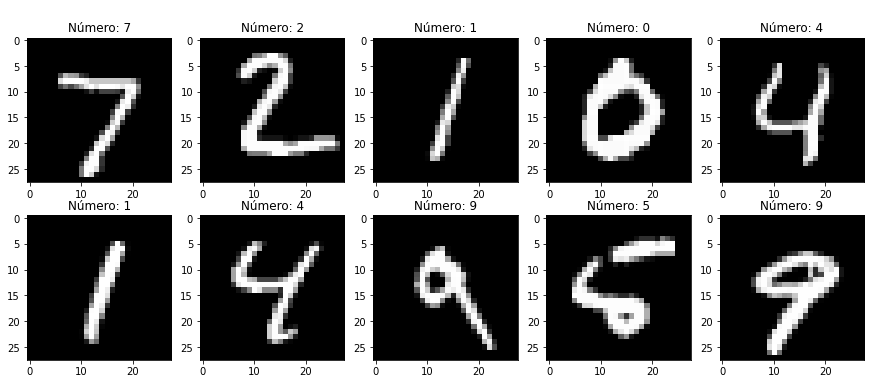

In [20]:
# imprimindo 10 elementos desse dataset
fig, axs = plt.subplots(2,5,figsize=(15,6))
axs = axs.flatten()
for i in range(10):
  dado, rotulo = MNIST[i]
  axs[i].imshow(dado[0],cmap='gray')
  axs[i].set_title('\nNúmero: {}'.format(str(rotulo)))

# Detecção/Regressão

In [21]:
# detecção ou regressão
# a camada de saída será igual a um Multi Layer Perceptron (MLP) com xmin,xmax,ymin,ymax.
VOC = datasets.VOCDetection('.',  
                            image_set = 'train', 
                            download = True, 
                            transform = transforms.ToTensor())

  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting ./VOCtrainval_11-May-2012.tar to .


<class 'torch.Tensor'> <class 'dict'>
torch.Size([3, 442, 500])


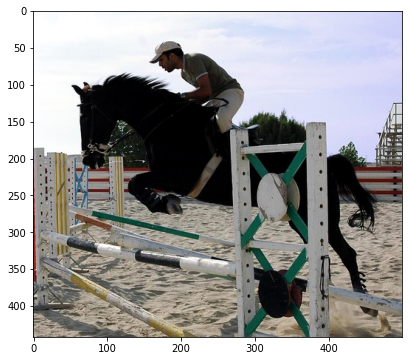

In [22]:
# analisando um elemento desse dataset
dado, rotulo = VOC[0]
print(type(dado),type(rotulo))

print(dado.size()) #(canal=rgb(3))  #diferente do problema anterior que temos somente 1 canal, aqui temos 3. Para o matplot desenhar a imagem é preciso inverter a posição do canal.
dado = dado.permute(1,2,0)
plt.figure(figsize=(8,6))
plt.imshow(dado)

In [23]:
# analisando a saída da CNN
rotulo

{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

> Como podemos ver a saída é um dicionario que contem diversas informações. Dentre elas temos diversos elementos que foram detectados. Nesse exemplo ele detectou uma pessoa e um cavalo. Dentro de cada elemento detectado você pode obter as informações espaciais de onde esse elemento está dentro da imagem. A seguir vamos plotar o cavalo.

In [24]:
# acessando o elemento cavalo
bbox = rotulo['annotation']['object'][0]['bndbox']
bbox

{'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'}

In [25]:
# criando o grid do quadrado para plotar sobre a imagem
xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

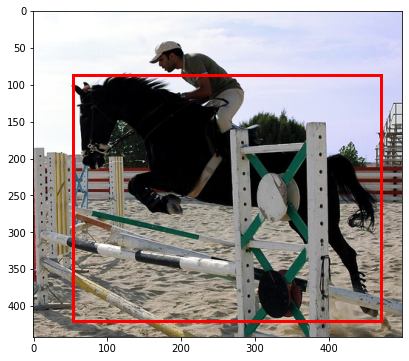

In [27]:
# plot
fig, ax = plt.subplots(figsize=(8,6))
ax.imshow(dado)

w,h = (xmax-xmin),(ymax-ymin)
ret = patches.Rectangle((xmin,ymin),w,h,fill=False,color='r',linewidth=3)
ax.add_patch(ret)
plt.show()

# Segmentação

> Em problemas de segmentação temos como saída um tensor. Além disso, problemas de segmentação são criados para destacar determinado objeto na imagem. A seguir temos imagens que demonstram visualmente. 

In [28]:
# dataset
VOCs = datasets.VOCSegmentation('.', 
                         image_set = 'val', 
                         download = True, 
                         transform = transforms.ToTensor(), 
                         target_transform = transforms.ToTensor())

Using downloaded and verified file: ./VOCtrainval_11-May-2012.tar
Extracting ./VOCtrainval_11-May-2012.tar to .


In [34]:
# analisando 1 elemento desse dataset

dado, rotulo = VOCs[10]

print('O tipo de variavel do dado é {}'.format(type(dado)))
print('O tipo de variavel do rotulo é {}'.format(type(rotulo)))

# verificando o tamanho do tensor e se possui mais de uma cor (cor=canal)
print('')
print('A imagem de input é um tensor contendo (canal,altura,largura)')
print(dado.size()) #torch.size(canal,altura,largura)

print('')
print('O rotulo de saída da CNN será do tipo tensor contendo (canal,altura,largura)')
print(rotulo.size()) #torch.size(canal,altura,largura)

O tipo de variavel do dado é <class 'torch.Tensor'>
O tipo de variavel do rotulo é <class 'torch.Tensor'>

A imagem de input é um tensor contendo (canal,altura,largura)
torch.Size([3, 375, 500])

O rotulo de saída da CNN será do tipo tensor contendo (canal,altura,largura)
torch.Size([1, 375, 500])


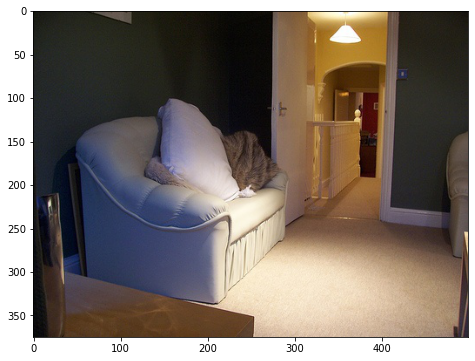

In [35]:
# como o dado de entrada contem 3 canais, vamos permutar para imprimir usando o matplot
dado = dado.permute(1,2,0)
plt.figure(figsize=(8,6))
plt.imshow(dado)

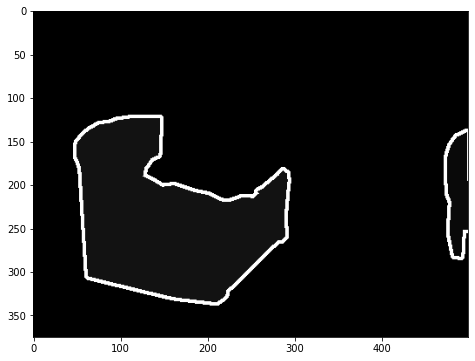

In [36]:
b# plotando o rotulo de saída para mostrar como funciona a segmentação
plt.figure(figsize=(8,6))
plt.imshow(rotulo[0],cmap='gray')

# Dicas de Datasets 

> Existem diversos datasets na literatura que você pode utilizar para criar projetos. A seguir disponibilizo links uteis que contem datasets dentro do pytorch que você pode utilizar para Classificação, Regressão e Segmentação. 

https://pytorch.org/vision/stable/datasets.html

In [ ]:
CIFAR = datasets.CIFAR10('.', 
                         train = True, 
                         transform = transforms.ToTensor(),
                         download = True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


In [ ]:
dado, rotulo = CIFAR[10]
print(type(dado),type(rotulo))
print(dado.size())

<class 'torch.Tensor'> <class 'int'>
torch.Size([3, 32, 32])


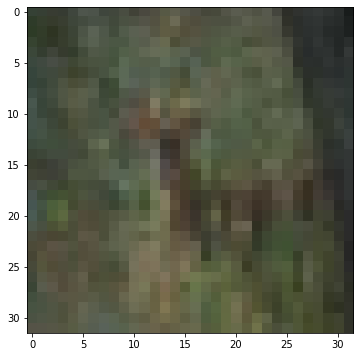

In [ ]:
dado = dado.permute(1,2,0)
plt.figure(figsize=(8,6))
plt.imshow(dado)

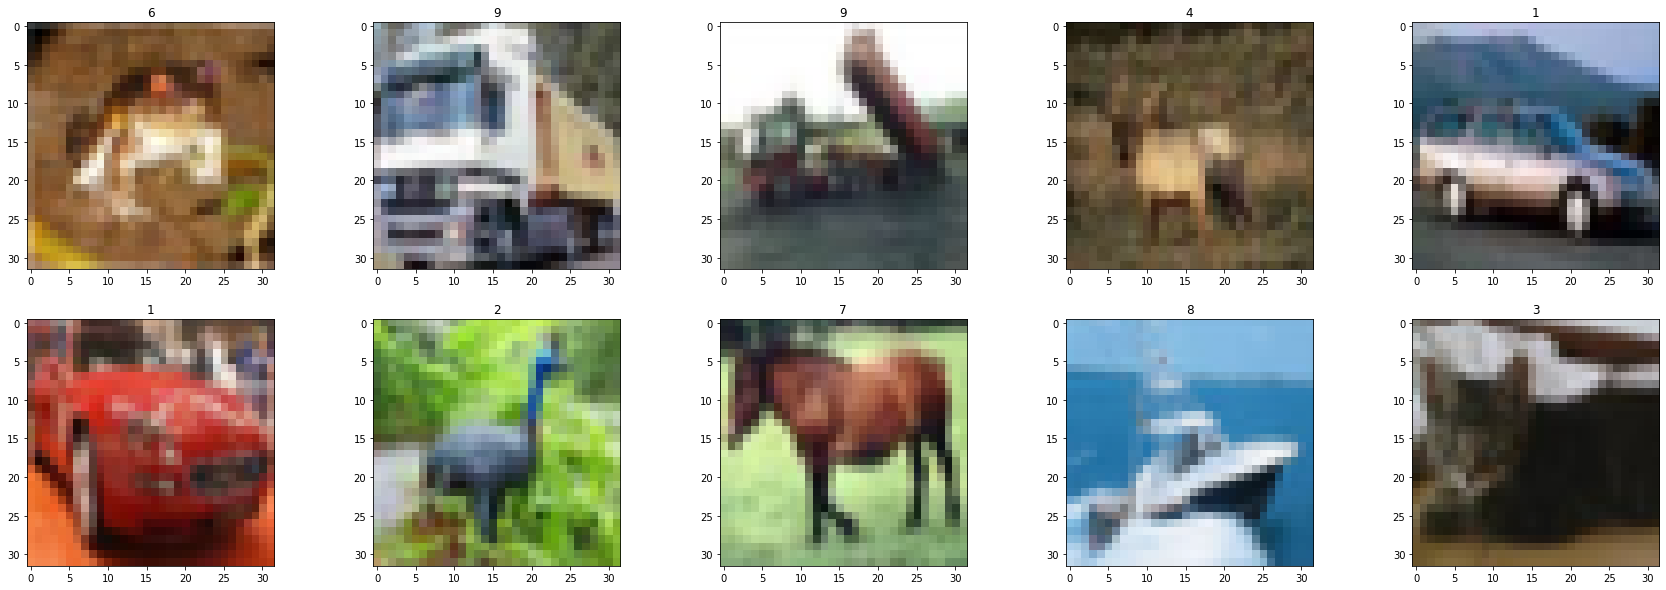

In [ ]:
fig, axs = plt.subplots(2,5,figsize=(30,10))
axs = axs.flatten()
for i in range(10):
  dado, rotulo = CIFAR[i]
  axs[i].imshow(dado.permute(1,2,0))
  axs[i].set_title(str(rotulo))